In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-65.79094055591314 -158.43803175811374
-84.23942311979741 -93.55146741165699
-45.478749606862195 -76.15157258555213
62.67991630389088 -135.26990662346003
-2.823359894233903 136.1020583503559
23.203626600859863 13.712218618637706
-1.5657584084838163 93.76428226339436
-19.59213233663408 -146.68581950508312
47.47112926147702 63.884850629728135
-37.30773610989608 -172.94991066948808
-78.9949331712167 -105.30977063268536
-19.09070665879041 177.30135050685675
45.720269860244144 10.71742352827377
56.592268954624586 46.03589326624112
-70.89316513312679 151.84790052014068
-11.838969937844453 -55.5613338807572
-68.9999451395349 -58.515651263862736
-35.25068761970205 -65.5646336287682
38.770199223802535 1.048684084311077
5.894211689949088 43.902643586053046
65.76281657984356 22.97163325296762
88.56893314700284 -128.99995852016843
69.54310619719578 -179.06290924716185
17.766915847639254 -83.6717792756569
33.60991859815596 -108.82972570739491
-51.32703476605768 -134.95944123003682
38.57124826808592

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
punta arenas cl
castro cl
mayo ca
nabire id
marzuq ly
sibolga id
tautira pf
dzhusaly kz
vaini to
punta arenas cl
isangel vu
salo it
yurino ru
hobart au
alta floresta br
ushuaia ar
mercedes ar
santa eulalia del rio es
xuddur so
lulea se
tuktoyaktuk ca
mys shmidta ru
barra patuca hn
silver city us
rikitea pf
xianshuigu cn
vostok ru
belushya guba ru
kapaa us
faya td
new norfolk au
kamiiso jp
port elizabeth za
vaini to
ancud cl
amderma ru
nikolskoye ru
najran sa
ushuaia ar
hithadhoo mv
ponta do sol cv
lyuban by
isangel vu
carnarvon au
rikitea pf
nome us
bambous virieux mu
cape town za
broome au
sentyabrskiy ru
robertsport lr
coihaique cl
asfi ma
mustasaari fi
bethel us
katsuura jp
vaitupu wf
lompoc us
sangar ru
muros es
jamestown sh
mataura pf
avarua ck
hobart au
mahebourg mu
salinas ec
irbil iq
rikitea pf
totness sr
tsihombe mg
lebu cl
ilulissat gl
samarai pg
sain alto mx
busselton au
maceio br
khatanga ru
hermanus za
mataura pf
moree au
albany au
port hedland au
castro cl
mata

nikolskoye ru
vila do maio cv
mehamn no
marcona pe
taranagar in
jiayuguan cn
vaini to
terney ru
vestmanna fo
kapaa us
east london za
georgetown sh
barrow us
tazovskiy ru
bredasdorp za
bauchi ng
kungurtug ru
mahebourg mu
tazovskiy ru
jamestown sh
barrow us
new norfolk au
leskovik al
hobart au
rikitea pf
charlotte us
labutta mm
mataura pf
maun bw
atar mr
lorengau pg
cape town za
hilo us
hilo us
san quintin mx
barrow us
sorland no
bathsheba bb
puerto ayora ec
belushya guba ru
cape town za
albany au
rusape zw
hermanus za
riberalta bo
rikitea pf
port alfred za
pisco pe
soure br
punta arenas cl
willemstad an
sitka us
redmond us
san ramon de la nueva oran ar
richards bay za
dunedin nz
sarandi br
margate za
nikolskoye ru
torbay ca
jonesboro us
hobart au
hermanus za
rikitea pf
shalinskoye ru
carnarvon au
brae gb
eastbourne gb
chuy uy
busselton au
rikitea pf
tuktoyaktuk ca
hasaki jp
tuktoyaktuk ca
dikson ru
maloshuyka ru
albany au
salalah om
grindavik is
agirish ru
severobaykalsk ru
kaitangata n

mahebourg mu
tabiauea ki
jamestown sh
ushuaia ar
atuona pf
cape town za
saint-joseph re
provideniya ru
xai-xai mz
rikitea pf
unidos ph
new norfolk au
pevek ru
marsh harbour bs
pasni pk
hermanus za
hermanus za
huarmey pe
catalina ca
lamar us
umm jarr sd
taolanaro mg
illoqqortoormiut gl
ambulu id
ushuaia ar
severo-kurilsk ru
alta floresta br
avarua ck
le vauclin mq
albany au
severo-kurilsk ru
zhuozhou cn
butaritari ki
progreso mx
waitati nz
ikom ng
hermanus za
coquimbo cl
barrow us
longyearbyen sj
bluff nz
bluff nz
mys shmidta ru
sitka us
rikitea pf
namibe ao
hermanus za
hobart au
roald no
alice springs au
barrow us
los llanos de aridane es
albany au
mahajanga mg
honiara sb
castro cl
katsuura jp
hobart au
rikitea pf
hithadhoo mv
busselton au
tahta eg
khatanga ru
talnakh ru
avera pf
anastacio br
bowen au
hobart au
port lincoln au
thompson ca
upernavik gl
clyde river ca
hermanus za
nizhneyansk ru
mataura pf
punta arenas cl
aklavik ca
yellowknife ca
carnarvon au
chuy uy
taolanaro mg
esperan

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | mayo
Processing Record 5 of Set 1 | nabire
Processing Record 6 of Set 1 | marzuq
Processing Record 7 of Set 1 | sibolga
Processing Record 8 of Set 1 | tautira
Processing Record 9 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | salo
Processing Record 13 of Set 1 | yurino
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | alta floresta
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mercedes
Processing Record 18 of Set 1 | santa eulalia del rio
City not found. Skipping...
Processing Record 19 of Set 1 | xuddur
Processing Record 20 of Set 1 | lulea
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | mys sh

Processing Record 37 of Set 4 | aswan
Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | kloulklubed
Processing Record 40 of Set 4 | madison
Processing Record 41 of Set 4 | mandan
Processing Record 42 of Set 4 | jasper
Processing Record 43 of Set 4 | zhanakorgan
Processing Record 44 of Set 4 | puerto escondido
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | severnoye
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | kandrian
Processing Record 50 of Set 4 | sakakah
Processing Record 1 of Set 5 | wanning
Processing Record 2 of Set 5 | sorgun
Processing Record 3 of Set 5 | sal rei
Processing Record 4 of Set 5 | cheyur
City not found. Skipping...
Processing Record 5 of Set 5 | roberto payan
City not found. Skipping...
Processing Record 6 of Set 5 | chokurdakh
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | laguna
Processing Record 9 of Set 5 | coa

Processing Record 28 of Set 8 | redmond
Processing Record 29 of Set 8 | san ramon de la nueva oran
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | sarandi
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | jonesboro
Processing Record 34 of Set 8 | shalinskoye
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | eastbourne
Processing Record 37 of Set 8 | hasaki
Processing Record 38 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | agirish
Processing Record 41 of Set 8 | severobaykalsk
Processing Record 42 of Set 8 | beloha
Processing Record 43 of Set 8 | mbanza-ngungu
Processing Record 44 of Set 8 | kaa-khem
Processing Record 45 of Set 8 | asmara
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 | svetlyy
Processing Record 48 of Set 8 | auki
Processing Record 49 of Set 8 | magadan
Processing Record 50 of Set 8 | mombetsu
Processing

Processing Record 14 of Set 12 | idil
Processing Record 15 of Set 12 | phan rang
City not found. Skipping...
Processing Record 16 of Set 12 | kazachinskoye
Processing Record 17 of Set 12 | amalapuram
Processing Record 18 of Set 12 | paramonga
Processing Record 19 of Set 12 | vanimo
Processing Record 20 of Set 12 | fuxin
Processing Record 21 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 22 of Set 12 | muravlenko
Processing Record 23 of Set 12 | baijiantan
Processing Record 24 of Set 12 | kamenskiy
Processing Record 25 of Set 12 | worthington
Processing Record 26 of Set 12 | lysyye gory
Processing Record 27 of Set 12 | papagaios
Processing Record 28 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 29 of Set 12 | saleaula
City not found. Skipping...
Processing Record 30 of Set 12 | dalby
Processing Record 31 of Set 12 | bardiyah
Processing Record 32 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 12 | saint-joseph
Process

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,42.85,99,11,1.19,NZ,2023-01-12 15:25:25
1,Punta Arenas,-53.1500,-70.9167,59.11,58,75,28.77,CL,2023-01-12 15:23:11
2,Castro,-24.7911,-50.0119,74.37,70,100,4.92,BR,2023-01-12 15:25:25
3,Mayo,38.8876,-76.5119,49.06,89,0,5.75,US,2023-01-12 15:25:26
4,Nabire,-3.3667,135.4833,78.21,88,100,2.37,ID,2023-01-12 15:25:09
5,Marzuq,14.4000,46.4667,69.60,49,55,3.53,YE,2023-01-12 15:25:27
6,Sibolga,1.7427,98.7792,75.81,90,83,3.02,ID,2023-01-12 15:25:27
7,Tautira,-17.7333,-149.1500,76.46,82,100,24.83,PF,2023-01-12 15:25:29
8,Vaini,-21.2000,-175.2000,78.96,94,75,9.22,TO,2023-01-12 15:25:31
9,Isangel,-19.5500,169.2667,76.41,81,48,5.91,VU,2023-01-12 15:25:32


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
today = time.strftime("%x")
today

'01/12/23'

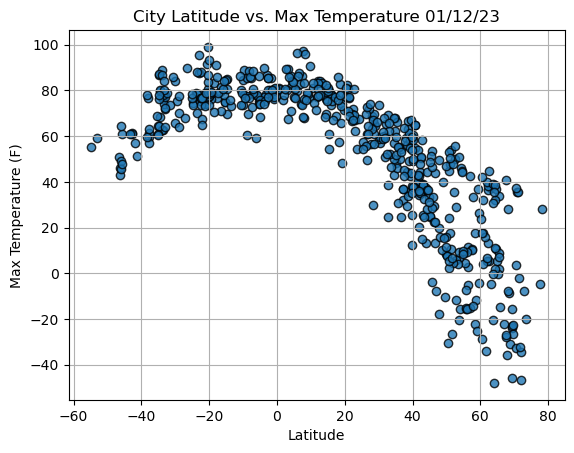

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

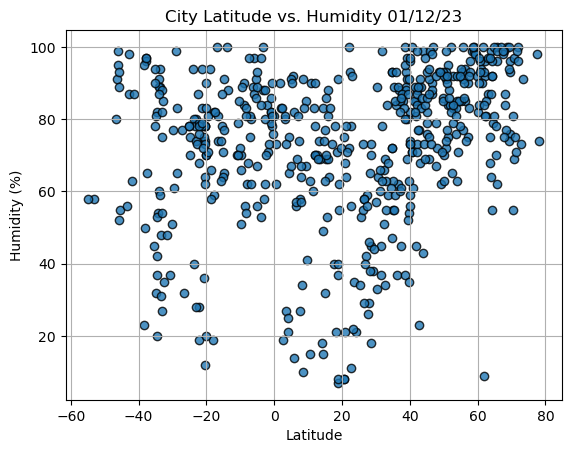

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

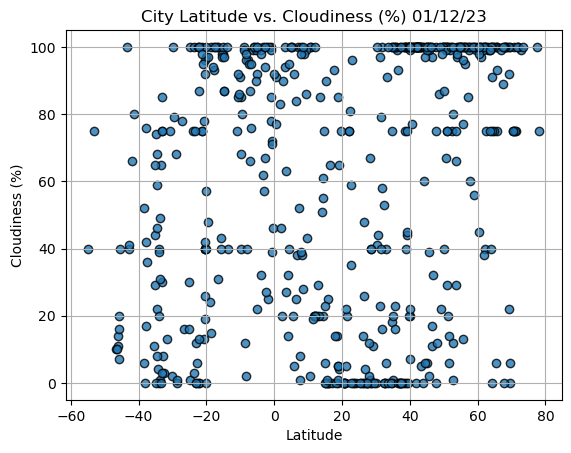

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

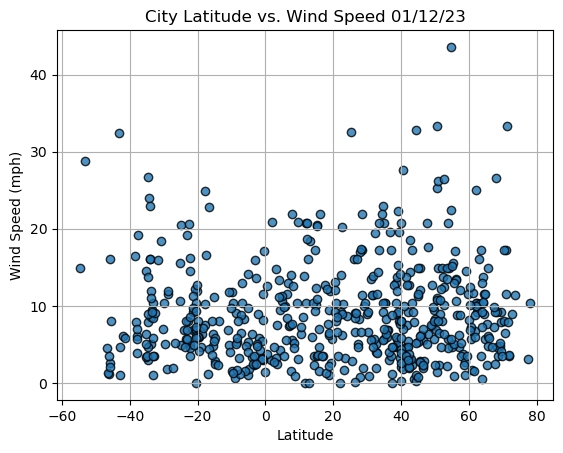

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
#city data datafrme
city_data_df = pd.read_csv("weather_data/cities.csv")

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

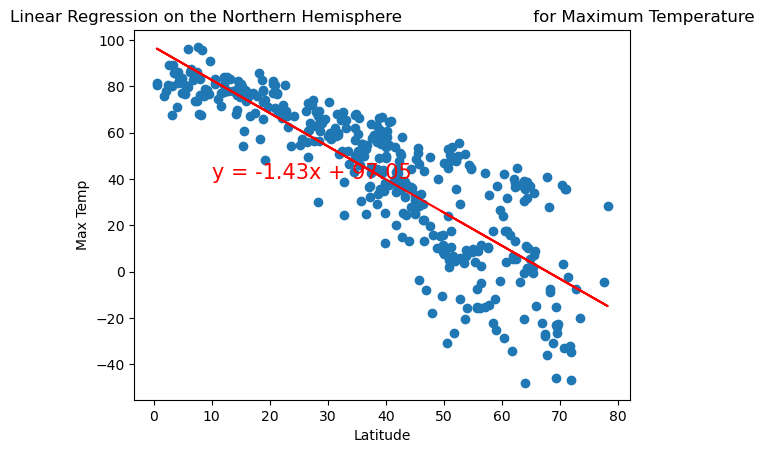

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

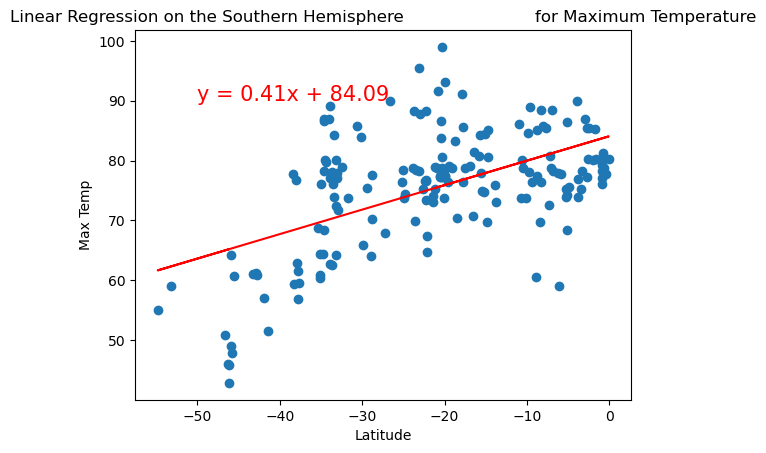

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

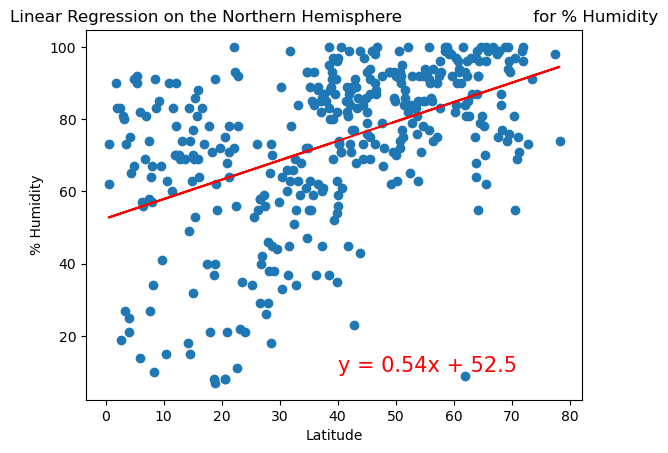

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

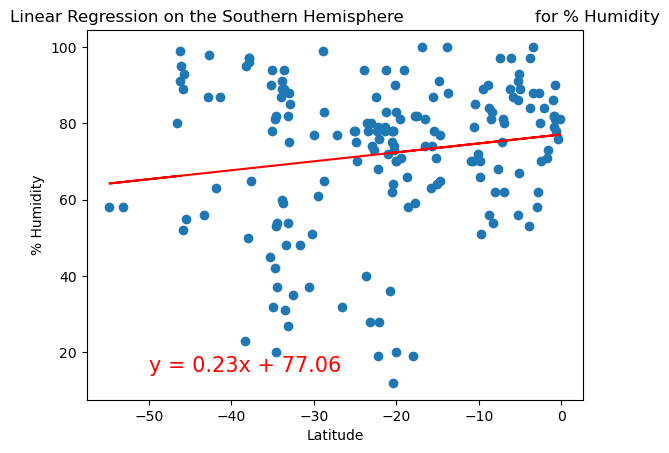

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

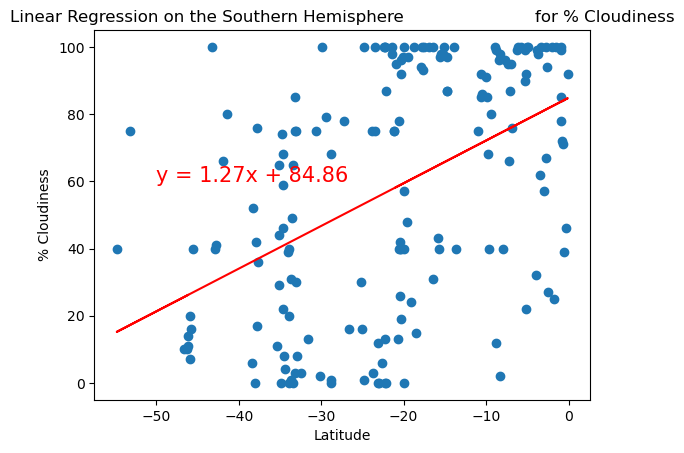

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

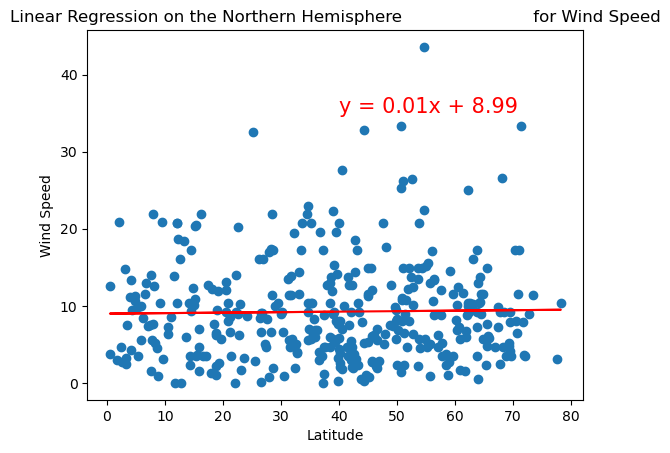

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))